In [173]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import cmath #for complex numbers

from scipy.spatial import distance_matrix

In [174]:
dipole_vector_hat = np.array([1, 0, 0]) #i y retning 

In [175]:
x_values = np.arange(-24.5, 0.5, 1).tolist() + np.arange(0.5, 25.5, 1).tolist()
points = np.array([[x, 0, 0] for x in x_values])

#distance_matrix = distance_matrix(points, points) eventuelt for hurtigere 
r_ij_vector = points[:, np.newaxis] - points
r_ij = np.linalg.norm(r_ij_vector, axis=2, keepdims=True)
r_ij_hat = np.divide(r_ij_vector, r_ij, out=np.zeros_like(r_ij_vector, dtype=float), where=(r_ij != 0)) 

Loop through different values of d. Value of $\pi$ corresponds to $k_er_{ij} = \frac{2\pi}{\lambda_e}r_{ij} =\pi$ so $r_{ij} = \frac{\lambda_e}{2}$. Thus we let d run from 0 to 4 $\pi$ 

In [176]:
distances = np.linspace(0, 4, 200) * np.pi
decay_rate_list = []
level_shift_list = []

#skipping first one as it is 0
for d in distances[1:]: 
    k_e__r_ij_vector =  d * r_ij_vector 
    k_e__r_ij = np.linalg.norm(k_e__r_ij_vector, axis=2, keepdims=True)

    F = np.zeros(shape = (len(k_e__r_ij), len(k_e__r_ij)), dtype=complex)

    for l in range(len(k_e__r_ij)): 
        dot_product = np.dot(r_ij_hat[l, :, :] , dipole_vector_hat)

        denom1 = (k_e__r_ij[l].flatten())
        denom2 = (k_e__r_ij[l].flatten())**2
        denom3 = (k_e__r_ij[l].flatten())**3
        safe_denom1 = np.where(denom1 == 0, np.nan, denom1)
        safe_denom2 = np.where(denom2 == 0, np.nan, denom2)
        safe_denom3 = np.where(denom3 == 0, np.nan, denom3)

        f_ji =  3/2 * (1 - (dot_product)**2) * np.sin(k_e__r_ij[l].flatten())/safe_denom1 \
            + 3/2 * (1 - 3 * (dot_product)**2) * (np.cos(k_e__r_ij[l].flatten())/safe_denom2 - np.sin(k_e__r_ij[l].flatten())/ safe_denom3) 
        g_ji = -3/2 * (1 - (dot_product)**2) * np.cos(k_e__r_ij[l].flatten())/safe_denom1 \
            + 3/2 * (1 - 3 * (dot_product)**2) * (np.sin(k_e__r_ij[l].flatten())/safe_denom2 + np.cos(k_e__r_ij[l].flatten())/ safe_denom3) 
        
        f_ji = np.nan_to_num(f_ji)
        g_ji = np.nan_to_num(g_ji)

        #Fill F
        F[:, l] = f_ji + 1j * g_ji 


    I = np.eye(len(k_e__r_ij), dtype = complex)
    A =  -1/2 * (I + F)
    #Note eigenvectors are in the columns 
    A_eigenvalues, A_eigenvectors = np.linalg.eig(A)

    decay_rate = 2 * A_eigenvalues.real
    decay_rate_list.append(decay_rate)
    level_shift = 2 * A_eigenvalues.imag
    level_shift_list.append(level_shift)

### WHY ARE MY RESULTS FLIPPED? 

(-3.0, 3.0)

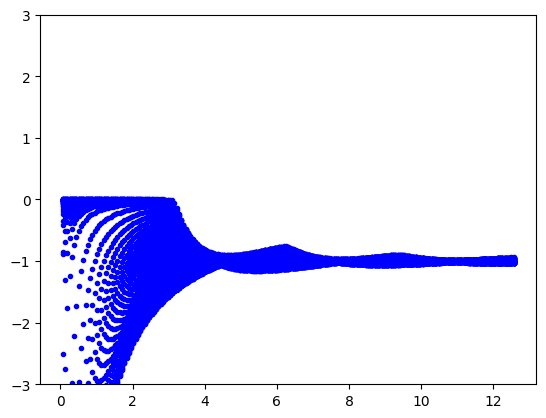

In [177]:
plt.plot(distances[1:], decay_rate_list, '.', c = 'blue');
plt.ylim(-3, 3)

(0.0, 3.0)

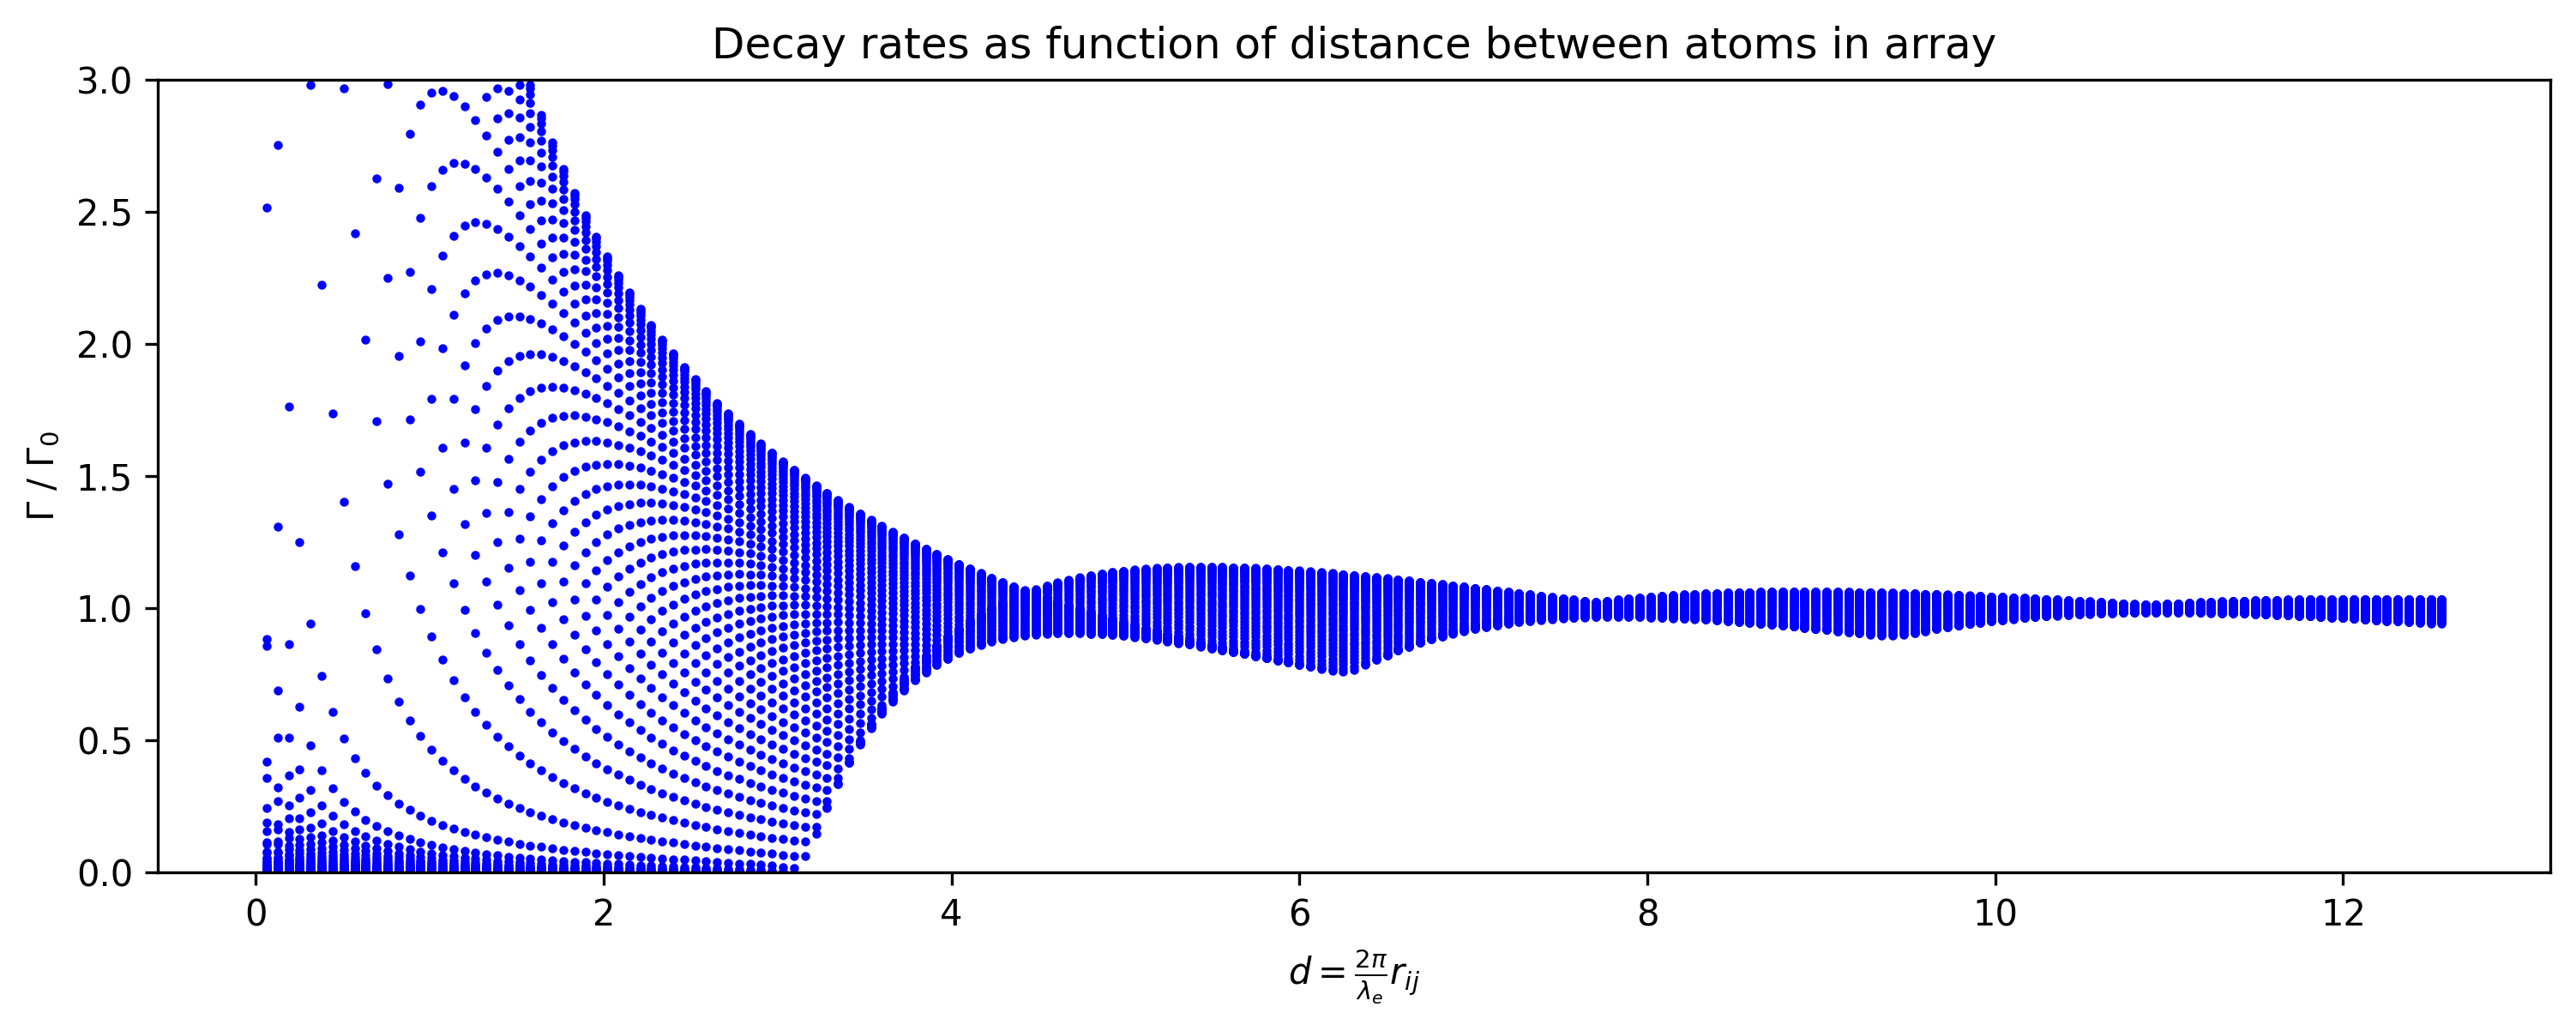

In [178]:
decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$d=\frac{2 \pi}{\lambda_e} r_{ij}$')
plt.ylabel(r'$\Gamma$ / $\Gamma_0$')
plt.title('Decay rates as function of distance between atoms in array')

plt.ylim(-0, 3)

Agrees with the plot from A.Asenjo-Garcia 

Text(0.5, 1.0, 'd = 10.861385656632049')

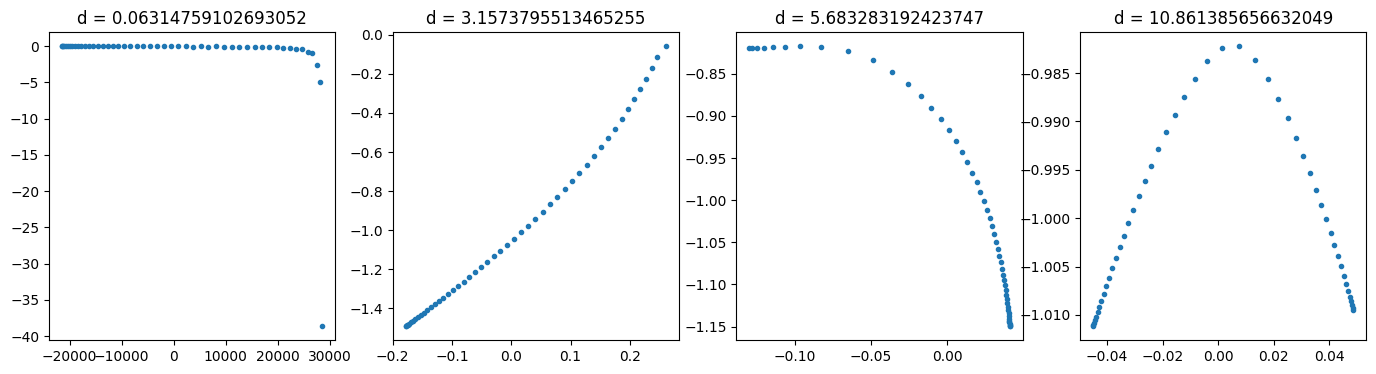

In [179]:
fig, ax = plt.subplots(1, 4, figsize=(17, 4)) 

ax[0].plot(level_shift_list[0], decay_rate_list[0], '.')
ax[0].set_title(f'd = {distances[1]}') #OBS d is not distance between atoms but rather r_ij = {d\lambda_e} / (2π)

ax[1].plot(level_shift_list[49], decay_rate_list[49], '.')
ax[1].set_title(f'd = {distances[50]}')


ax[2].plot(level_shift_list[90], decay_rate_list[90], '.')
ax[2].set_title(f'd = {distances[90]}')

ax[3].plot(level_shift_list[171], decay_rate_list[171], '.')
ax[3].set_title(f'd = {distances[172]}')

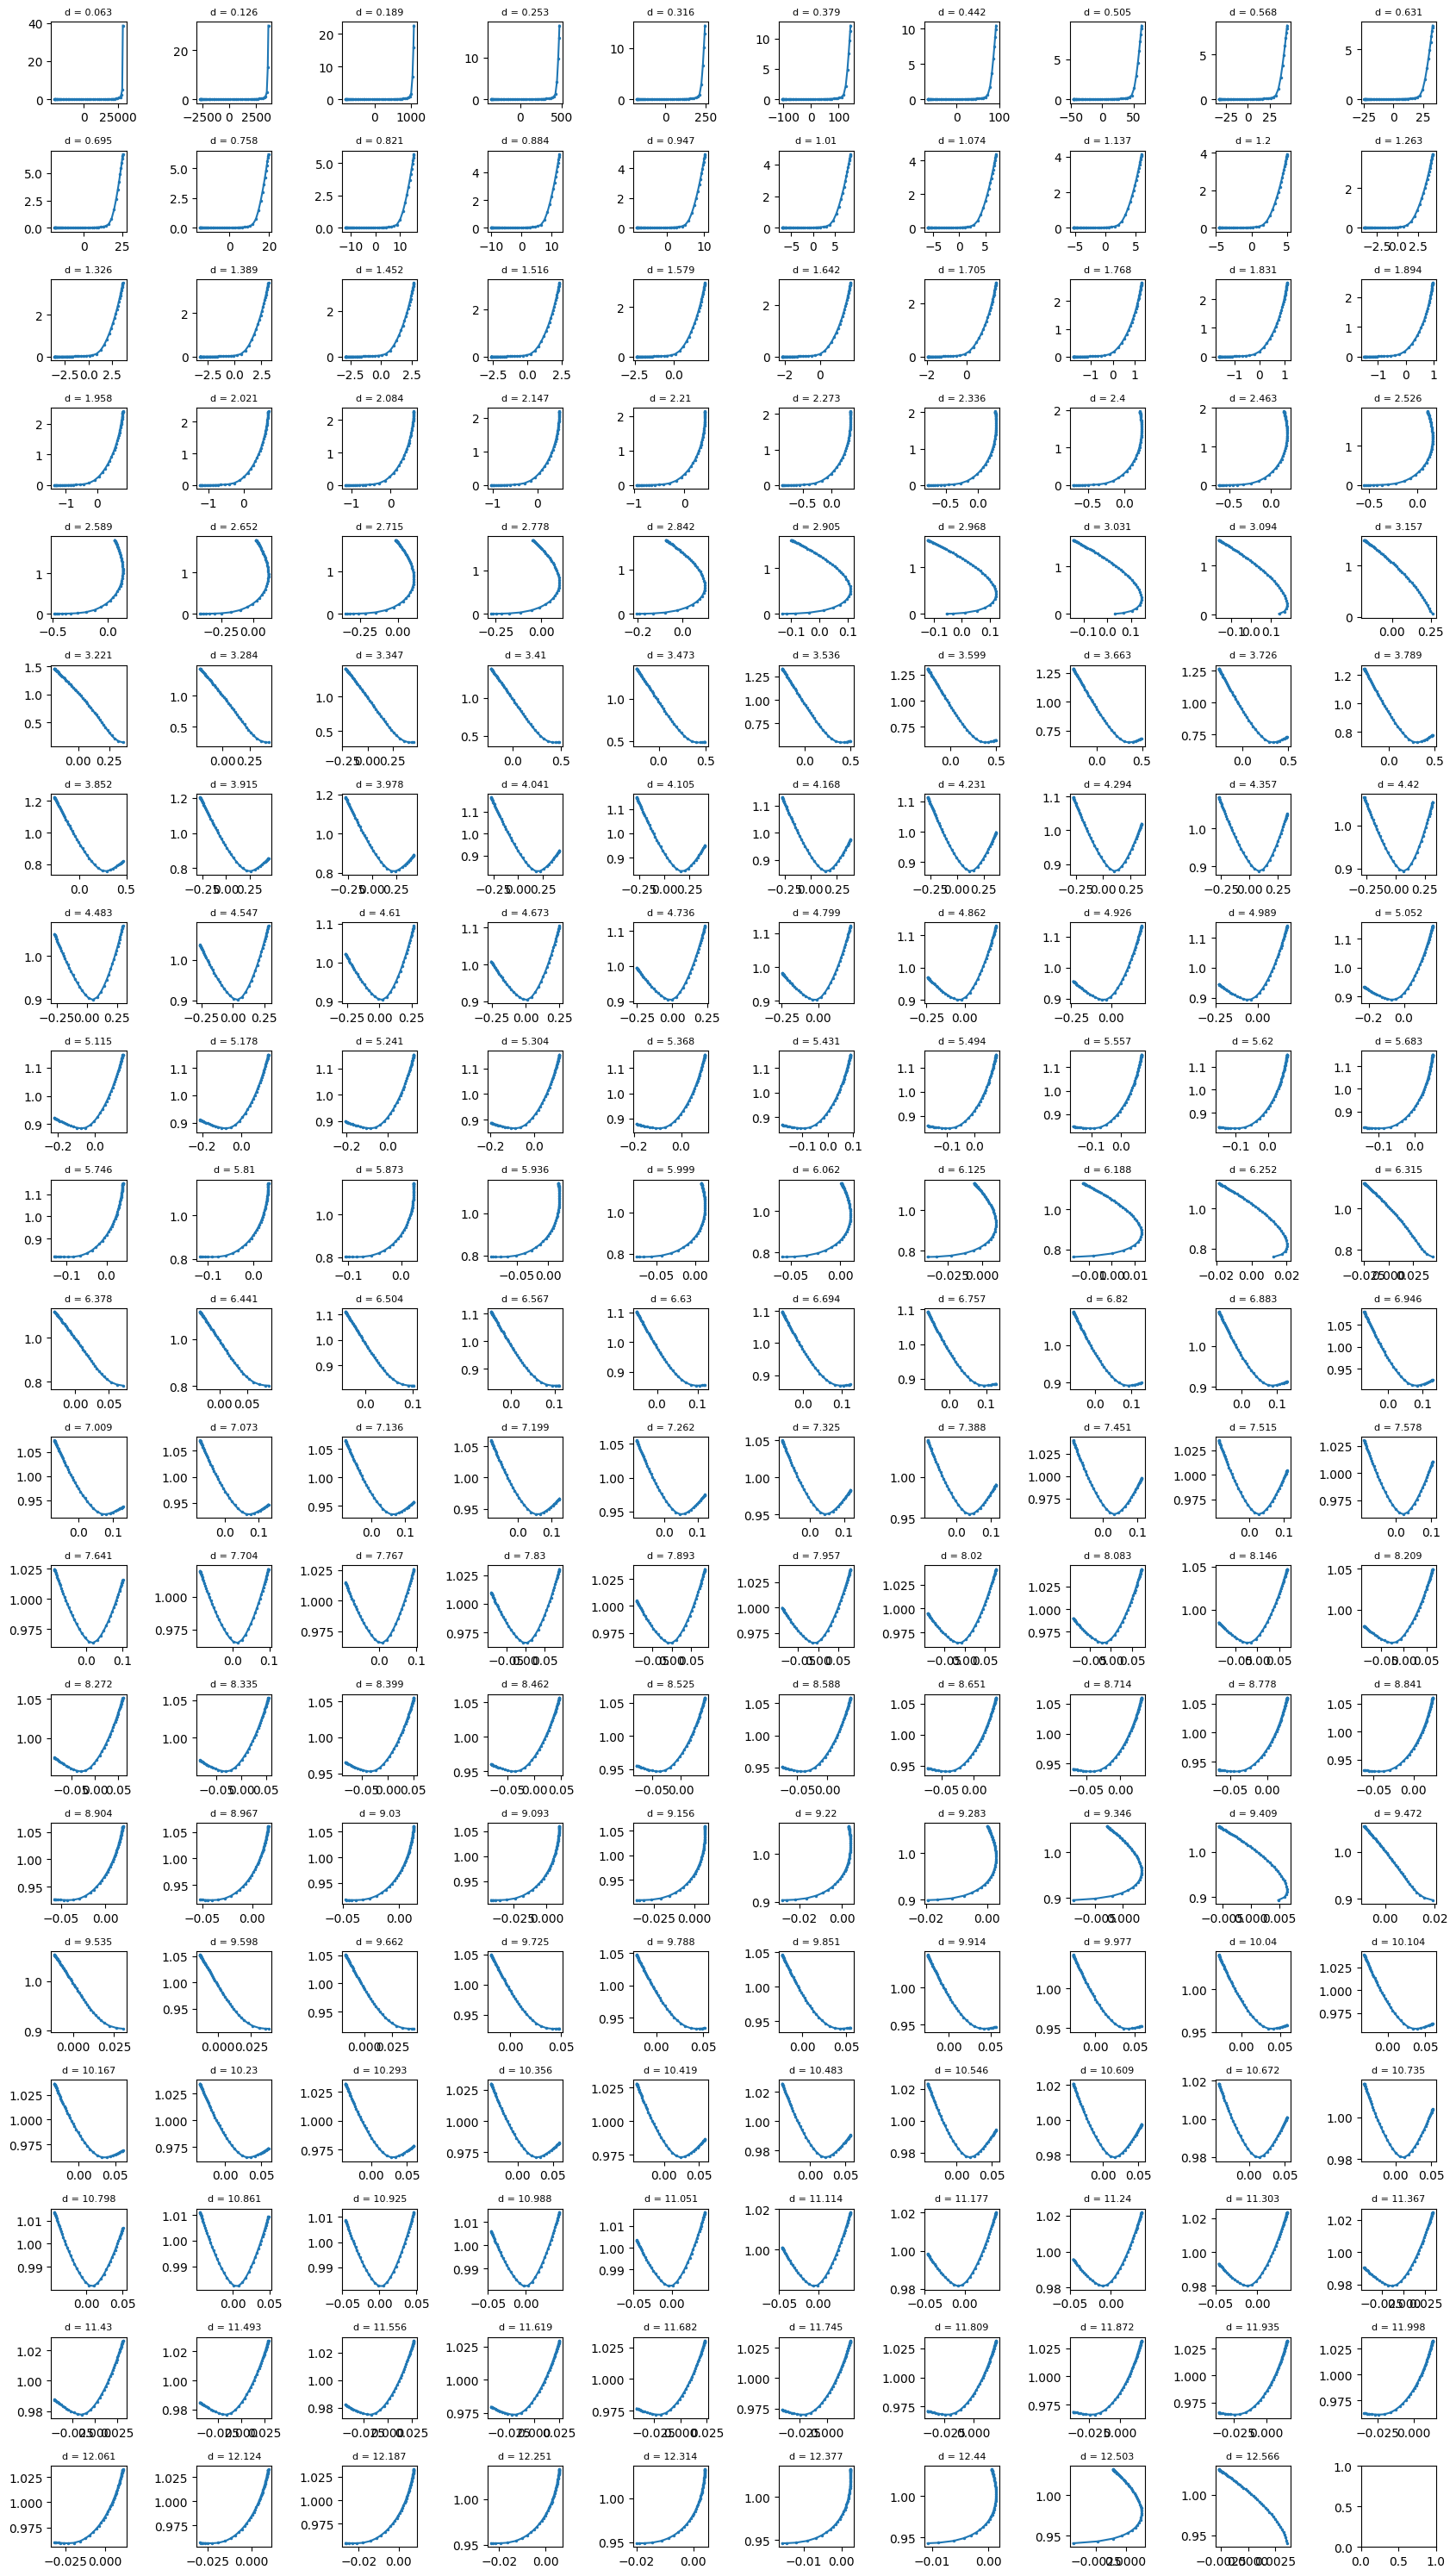

In [180]:
rows, cols = 20, 10  
fig, axes = plt.subplots(rows, cols, figsize=(17, 30))  # Large figure for visibility

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each of the 199 datasets
for i in range(len(level_shift_list)):
    ax = axes[i]  # Select subplot
    ax.plot(level_shift_list[i], decay_rate_list_reversed[i], marker=".", markersize=3)  # Plot with dots
    ax.set_title(f"d = {distances[i+1].round(3)}", fontsize=8)  # Small title

plt.tight_layout()

Note when d > $\pi = 3.14$ then $r_{ij} > \frac{\lambda_e}{\pi}$ and the y-axis shifts. Here there are no more subradiant states (ie. no states with $\Gamma = 0$) in agreement with the figure for "Decay rates as function of distance between atoms in array". <br>
We also see that as the distance between atoms get big (the last plots) then they get close to no energy shift and 1 as decay rate as expected. If we seperate them infinitly we would have no energy shift and decay rate 1. <br>
Lastly we notice that the developments of the plots are cyclic in $\pi$. That is the structure of the plots develop as a straight line for multiple of $\pi$ and then goes around to a parabola and then back all the way around to th straight line. 

In [181]:
 ?np.linalg.eig

Signature: np.linalg.eig(a)
Docstring:
Compute the eigenvalues and right eigenvectors of a square array.

Parameters
----------
a : (..., M, M) array
    Matrices for which the eigenvalues and right eigenvectors will
    be computed

Returns
-------
w : (..., M) array
    The eigenvalues, each repeated according to its multiplicity.
    The eigenvalues are not necessarily ordered. The resulting
    array will be of complex type, unless the imaginary part is
    zero in which case it will be cast to a real type. When `a`
    is real the resulting eigenvalues will be real (0 imaginary
    part) or occur in conjugate pairs

v : (..., M, M) array
    The normalized (unit "length") eigenvectors, such that the
    column ``v[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``w[i]``.

Raises
------
LinAlgError
    If the eigenvalue computation does not converge.

See Also
--------
eigvals : eigenvalues of a non-symmetric array.
eigh : eigenvalues and eigenvectors of a real symmet